# Early Fusion Model - CMU-MOSI Dataset

In this notebook, we implement the Early Fusion Model, and test it on CMU-MOSI dataset.

## Importing Libraries

In [1]:
import os
import sys
import torch

import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

## Importing Helper Functions

In [2]:
from helpers.data.get_data import get_dataloader
from helpers.unimodals.common_models import GRU, MLP, Sequential, Identity
from helpers.training.supervised_learning import train, test
from helpers.fusions.common_fusions import ConcatEarly
from helpers.utils.common_utils import get_default_device, save_results

## Loading the Dataset

In [3]:
traindata, validdata, testdata = get_dataloader(
    '/scratch/rrm9598/data/mosi_raw.pkl', robust_test=False, max_pad=True, data_type='mosi', max_seq_len=50)

In [4]:
device = get_default_device()
print(device)

cuda


## Model Architecture

In [5]:
encoders = [Identity().to(device), Identity().to(device), Identity().to(device)]
head = Sequential(GRU(409, 512, dropout=True, has_padding=False,
                  batch_first=True, last_only=True), MLP(512, 512, 1)).to(device)

In [6]:
fusion = ConcatEarly().to(device)

## Training

In [7]:
FILE_NAME = 'mosi_ef_r0'

In [8]:
train_losses, valid_losses = train(encoders, fusion, head, traindata, validdata, 100, task="regression", optimtype=torch.optim.AdamW,
      is_packed=False, lr=1e-3, save=f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/models/{FILE_NAME}.pt', weight_decay=0.01, objective=torch.nn.L1Loss())

Epoch [1/100]
Train Loss: 1.3298
Valid Loss: 1.3889
Saving Best

Epoch [2/100]
Train Loss: 1.3196
Valid Loss: 1.3810
Saving Best

Epoch [3/100]
Train Loss: 1.3303
Valid Loss: 1.3874

Epoch [4/100]
Train Loss: 1.3184
Valid Loss: 1.3763
Saving Best

Epoch [5/100]
Train Loss: 1.3237
Valid Loss: 1.3790

Epoch [6/100]
Train Loss: 1.3205
Valid Loss: 1.3894

Epoch [7/100]
Train Loss: 1.3198
Valid Loss: 1.4086

Epoch [8/100]
Train Loss: 1.3245
Valid Loss: 1.3756
Saving Best

Epoch [9/100]
Train Loss: 1.2464
Valid Loss: 1.3733
Saving Best

Epoch [10/100]
Train Loss: 1.1429
Valid Loss: 1.2972
Saving Best

Epoch [11/100]
Train Loss: 1.0726
Valid Loss: 1.3183

Epoch [12/100]
Train Loss: 1.0164
Valid Loss: 1.3053

Epoch [13/100]
Train Loss: 1.0089
Valid Loss: 1.4557

Epoch [14/100]
Train Loss: 0.9477
Valid Loss: 1.3217

Epoch [15/100]
Train Loss: 0.9270
Valid Loss: 1.3495

Epoch [16/100]
Train Loss: 0.8550
Valid Loss: 1.2353
Saving Best

Epoch [17/100]
Train Loss: 0.8129
Valid Loss: 1.1555
Saving B

Text(0.5, 1.0, 'Loss vs. No. of epochs')

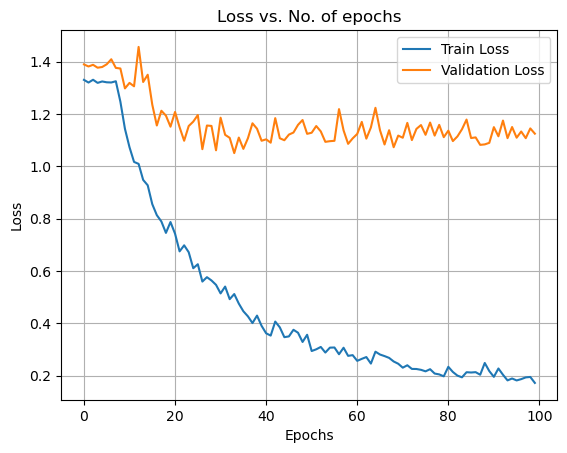

In [9]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss vs. No. of epochs')

In [10]:
save_results(train_losses, valid_losses, f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/results/{FILE_NAME}.pkl')

## Testing

In [11]:
model = torch.load(f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/models/{FILE_NAME}.pt').to(device)

test(model, testdata, 'affect', is_packed=False,
     criterion=torch.nn.L1Loss(), task="posneg-classification", no_robust=True)

Recall: 65.7012% | Total Accuracy: 65.7434%
Inference Time: 368ms
Inference Params: 1680897
